# 2) Plot Ethereum’s ‘High’ for first 15 and last 10 days.

In [117]:
#loading libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter
plt.style.use('fivethirtyeight')
import random
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib Inline
import plotly.graph_objects as go



In [118]:
#load the dataset
data = pd.read_csv(r"D:\Downloads\coin_Ethereum.csv")

In [119]:
data.shape

(2160, 10)

In [120]:
data.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Marketcap    float64
dtype: object

In [121]:
#converting date type object to datetime64
data['Date'] = data['Date'].astype('datetime64[ns]')

In [122]:
data['Date'] = data['Date'].dt.strftime('%d-%m-%Y')
data.head(15)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,08-08-2015,2.798810,0.714725,2.793760,0.753325,674188,4.548689e+07
1,2,Ethereum,ETH,08-09-2015,0.879810,0.629191,0.706136,0.701897,532170,4.239957e+07
2,3,Ethereum,ETH,08-10-2015,0.729854,0.636546,0.713989,0.708448,405283,4.281836e+07
3,4,Ethereum,ETH,08-11-2015,1.131410,0.663235,0.708087,1.067860,1463100,6.456929e+07
4,5,Ethereum,ETH,08-12-2015,1.289940,0.883608,1.058750,1.217440,2150620,7.364501e+07
5,6,Ethereum,ETH,13-08-2015,1.965070,1.171990,1.222240,1.827670,4068680,1.106072e+08
6,7,Ethereum,ETH,14-08-2015,2.261880,1.754750,1.810920,1.827870,4637030,1.106723e+08
7,8,Ethereum,ETH,15-08-2015,1.877240,1.570980,1.802890,1.688900,2554360,1.023036e+08
8,9,Ethereum,ETH,16-08-2015,1.695240,1.089810,1.684350,1.566030,3550790,9.490101e+07
9,10,Ethereum,ETH,17-08-2015,1.581190,1.185340,1.581190,1.203610,1942830,8.729537e+07


In [123]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data.head(15)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08,2.798810,0.714725,2.793760,0.753325,674188,4.548689e+07
1,2,Ethereum,ETH,2015-08-09,0.879810,0.629191,0.706136,0.701897,532170,4.239957e+07
2,3,Ethereum,ETH,2015-08-10,0.729854,0.636546,0.713989,0.708448,405283,4.281836e+07
3,4,Ethereum,ETH,2015-08-11,1.131410,0.663235,0.708087,1.067860,1463100,6.456929e+07
4,5,Ethereum,ETH,2015-08-12,1.289940,0.883608,1.058750,1.217440,2150620,7.364501e+07
5,6,Ethereum,ETH,2015-08-13,1.965070,1.171990,1.222240,1.827670,4068680,1.106072e+08
6,7,Ethereum,ETH,2015-08-14,2.261880,1.754750,1.810920,1.827870,4637030,1.106723e+08
7,8,Ethereum,ETH,2015-08-15,1.877240,1.570980,1.802890,1.688900,2554360,1.023036e+08
8,9,Ethereum,ETH,2015-08-16,1.695240,1.089810,1.684350,1.566030,3550790,9.490101e+07
9,10,Ethereum,ETH,2015-08-17,1.581190,1.185340,1.581190,1.203610,1942830,8.729537e+07


In [124]:
#set date as index
data = data.set_index(pd.DatetimeIndex(data['Date'].values))

In [125]:
data.tail(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2021-06-27,2151,Ethereum,ETH,2021-06-27,1979.958125,1811.245864,1830.996918,1978.894662,19885474742,2.304740e+11
2021-06-28,2152,Ethereum,ETH,2021-06-28,2139.805377,1963.615526,1981.386443,2079.657436,25514602841,2.422390e+11
2021-06-29,2153,Ethereum,ETH,2021-06-29,2242.238859,2076.240161,2083.448716,2160.768352,24815124419,2.517160e+11
2021-06-30,2154,Ethereum,ETH,2021-06-30,2282.988969,2090.760731,2164.216310,2274.547713,25828056268,2.650010e+11
2021-07-01,2155,Ethereum,ETH,2021-07-01,2274.397518,2081.080958,2274.397518,2113.605523,29061701793,2.462780e+11
2021-07-02,2156,Ethereum,ETH,2021-07-02,2155.596496,2021.824808,2109.892677,2150.040364,31796212554,2.505530e+11
2021-07-03,2157,Ethereum,ETH,2021-07-03,2237.567155,2117.590013,2150.835025,2226.114282,17433361641,2.594480e+11
2021-07-04,2158,Ethereum,ETH,2021-07-04,2384.286857,2190.837703,2226.550382,2321.724112,18787107473,2.706220e+11
2021-07-05,2159,Ethereum,ETH,2021-07-05,2321.922836,2163.041394,2321.922836,2198.582464,20103794829,2.562980e+11
2021-07-06,2160,Ethereum,ETH,2021-07-06,2346.294874,2197.919385,2197.919385,2324.679449,20891861314,2.710290e+11


# for first 15 days

In [126]:
filtered_data = data.query("Date >= '2015-08-01' \
                       and Date < '2015-08-22'")


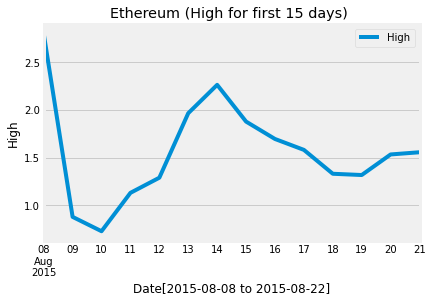

In [127]:
filtered_data.plot(x='Date', y='High')
plt.title("Ethereum (High for first 15 days) ")
plt.xlabel("Date[2015-08-08 to 2015-08-22]")
plt.ylabel("High")
plt.show()

# for last 10 days

In [128]:
last_fifteen_days = data.tail(10)

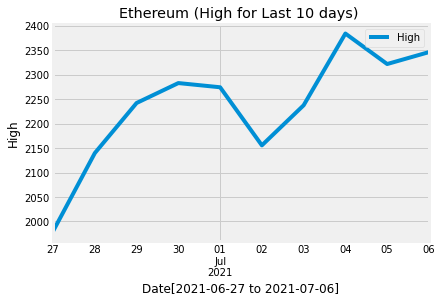

In [130]:
last_fifteen_days.plot(x='Date', y='High')
plt.title("Ethereum (High for Last 10 days) ")
plt.xlabel("Date[2021-06-27 to 2021-07-06]")
plt.ylabel("High")
plt.show()